## Week 6-1: Sparse PCA; intro to Bayesian analysis

#### Announcement
* TA will discuss Q1 in hw2 on Thursday's lab session
* Sign up groups on Canvas 
* Google form result

#### Last time
* PCA, PPCA, Factor analysis

#### Today
* Sparse PCA
* Introduction to Bayesian analysis

#### Reference
- Albert, I., S. Donnet, C. Guihenneuc-Jouyaux, ... (2012). Combining Expert Opinions in Prior Elicitation. _Bayesian Analysis_ 7:503--532
- Bradley Efron (2013). A 250-year argument: Belief, Behavior, and the bootstrap. _Bulletin (New Series) of the American Mathematical Society._ 50:129--146
- Y. Guan and J. Dy (2009). Sparse Probabilistic Principal Component Analysis. _Proceedings of the Twelth International Conference on Artificial Intelligence and Statistics_, PMLR 5:185-192
- Ning (2021). Spike and slab Bayesian sparse principal component analysis. _arXiv: 2102.00305_
- Robert, C. P. (1994). The Bayesian Choice. 2nd Edition. _Springer Text in Statistics_.
- Ročková, V. and E. I. George (2016). Fast Bayesian factor analysis via automatic rotations to sparsity. _JASA_ 111:1608–1622.
- F. Yao, H.-G. Müller, and J.-L. Wang (2005). Functional Data Analysis for Sparse Longitudinal Data. _JASA_ 100:577--590
- H. Zou, T. Hastie, and Robert Tibshirani (2006). Sparse Principal Component Analysis. _JCGS_ 15:265--286

### Sparse PCA

<img src="spca.png" width=70%>

Idea: imposing sparsity on loadings. Assume there are $s$ non-zero coordinates in each eigenvector and the remaining $p-s$ coordinates are all 0. Typically, we need $k s \log p \ll n$ (one might can improve it a bit by $k s \log (ep/s)$.




1. Direct sparse approximations

Let $Z_i = U_{i} D_{ii}$, for each $i$, we solve
$$
\hat \beta = arg\min_\beta \|Z_i - X \beta\|^2 + \text{Pen}_\lambda (\beta),
$$
then obtain $V_i = \hat \beta/\|\hat \beta\|$.

2. “Self-contained” regression-type criterion (Zou, Hastie, Tibshirani (2006))

Solve
\begin{align}
(\hat A, \hat B) & = arg\min_{A, B} \sum_{i=1}^n \|x_i' - x_i'BA'\|^2 + \sum_{j=1}^k\text{Pen}_{\lambda} (\beta_j),\\
& \text{s.t.} \quad A'A = I_{k\times k}
\end{align}

Algorithm:
- Given $A$, solve $B$ as in the regression setting 
- Given $B$, we minimize $\sum_{i=1}^n \|x_i' - x_i'BA'\|^2$ given $A'A = I_r$. That is, we compute SVD $(X'X)B = UDV'$ and let $\hat A = UV'$. 

Other methods:

- Joint-row sparsity for sparse PCA
- Sparse Probabilistic Principal Component Analysis by Guan and Dy (2009). 
- Bayseian methods for sparse PCA and factor analysis [Rockova and George (2016); Ning (2021)]
- Functional PCA (Yao, Müller, and Wang (2005))


#### Sparse PCA in action 

SparsePCA is avilable in scikit-learn see [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html)

The method is based on Zou et al (2006)'s paper, the elastic net penalty is added. 

In [55]:
from sklearn.decomposition import SparsePCA
spca = SparsePCA(n_components = 30, ridge_alpha = 0.01)

In [56]:
n = 200
d = 50
mean = np.zeros(d)
cov = np.identity(d)
x = np.random.multivariate_normal(mean, cov, n)

spca.fit(x)
t_spca = spca.transform(x)
p_spca = spca.components_.T

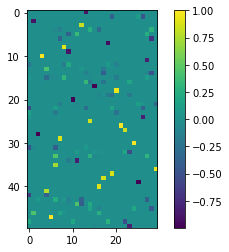

In [57]:
import matplotlib.pyplot as plt

plt.imshow(p_spca)
plt.colorbar()
plt.show()

### Bayesian analysis


<img src="tomb.jpg" width=40%>

                                           Thomas Bayes tomb in Central London


#### Bayes rule:

$$
\pi(\theta | X) = \frac{P(X | \theta) \pi(\theta)}{P(X)},
$$
where $P(X) = \int P(X|\theta) \pi(\theta) d\theta$.
- $P(X | \theta)$: _likelihood_
- $\pi(\theta)$: _prior_
- $\pi(\theta | X)$: _posterior_

#### Yesterday's posterior is today's prior:
$$
\pi(\theta | x_1) \propto f(x_1 | \theta) \pi(\theta)
$$
$$
\pi(\theta | x_1, x_2) \propto f(x_1, x_2 | \theta) \pi(\theta) = f(x_2 | x_1, \theta) f(x_1 | \theta) \pi(\theta)
= f(x_2 | x_1, \theta) \pi(\theta | x_1)
$$
$$
\cdots \cdots 
$$
$$
\pi(\theta | x^n, x_{n+1}) \propto f(x_{n+1}, x^n | \theta) \pi(\theta) = f(x_{n+1} | x^n, \theta) \pi(\theta | x^n)
$$

Let's watch a video first [video](https://www.youtube.com/watch?v=KhAUfqhLakw&list=WL&index=49)

_Bradley Efron (2013)_

    Two contending philosophical parties, the Bayesians and the frequentists, have been vying for supremacy over 
    the past two-and-a-half centuries. The twentieth century was predominantly frequentist, especially in applicat-
    ions, but the twenty-first has seen a strong Bayesian revival ... Unlike most philosophical arguments, this one has important practical consequences. The two philosophies represent competing visions of how science progress-es and how mathematical thinking assists in that progress.